# Analysis of the rankings obtained in the Hypertext hypergraph

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import scienceplots

plt.style.use(['science', 'no-latex'])

from collections import defaultdict

In [2]:
df = pandas.read_csv("../../Output/hypertext_dataframe.csv")

In [3]:
df.drop("AltUnif-2", axis=1, inplace=True)

In [4]:
df

,CEC,UPHEC-2,UPHEC-3,UPHEC-4,UPHEC-5,UPHEC-6,HEC-3unif,HEC-2unif,HEC-4unif,HEC-5unif,HEC-6unif,AltUnif-3,AltUnif-4,AltUnif-5,AltUnif-6
0,0.005759,0.007332,0.007767,0.007895,0.008008,0.008227,0.006142,0.006649,0.082375,0.136257,0.132212,0.007583,0.007849,0.008102,0.008277
1,0.006017,0.008168,0.007964,0.008047,0.008162,0.008442,0.007945,0.006803,0.084966,0.130405,0.117788,0.007672,0.007968,0.008276,0.008417
2,0.009996,0.010042,0.009199,0.008926,0.008847,0.009022,0.013382,0.009718,0.099748,0.117334,0.132212,0.009112,0.009177,0.009325,0.009386
3,0.010530,0.010458,0.009817,0.009454,0.009268,0.009322,0.005549,0.013713,0.094233,0.130405,0.117788,0.010323,0.010308,0.010297,0.010241
4,0.011438,0.010468,0.009378,0.008972,0.008902,0.009097,0.017367,0.009255,0.108562,0.108166,0.117788,0.009131,0.008977,0.009218,0.009299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.005714,0.007612,0.008004,0.008051,0.008124,0.008364,0.000000,0.009285,0.000000,0.000000,0.000000,0.008297,0.008553,0.008835,0.008990
109,0.006618,0.008051,0.008160,0.008185,0.008245,0.008468,0.000000,0.008345,0.000000,0.000000,0.000000,0.008242,0.008462,0.008673,0.008802
110,0.013130,0.011685,0.010420,0.009834,0.009560,0.009602,0.000000,0.016639,0.000000,0.000000,0.000000,0.010976,0.010885,0.010957,0.010890
111,0.004936,0.007123,0.007465,0.007644,0.007814,0.008124,0.000000,0.006764,0.000000,0.000000,0.000000,0.007281,0.007626,0.008067,0.008311


We have to sort the columns before showing the KT plots. This is a bit more cumbersome than it should due to the alphabetical sorting.

In [5]:
def sortcolumns(df):

    labeldict = {"U":[], "H":[], "A":[]}
    for label in df.columns:
        if "UPHEC" in label:
            labeldict["U"].append(label)
        elif "Alt" in label:
            labeldict["A"].append(label)
        elif "CEC" not in label:
            labeldict["H"].append(label)
    
    # Sort UPHEC, AltUnif
    for key in ["U","A"]:
        labeldict[key] = sorted(labeldict[key])
    
    # Sort the remaining one according to its number
    Hmindex = [int(label.split("-")[1].split("u")[0]) for label in labeldict["H"]]
    labeldict["H"] = list(np.array(labeldict["H"])[np.argsort(Hmindex)])
     
    return df.reindex(["CEC"]+ labeldict["U"]+ labeldict["H"]+ labeldict["A"], axis=1)

In [6]:
df = sortcolumns(df)

In [7]:
#df[labeldict["U"] + labeldict["A"]]

In [8]:
df.sum() # consistency check

CEC          1.0
UPHEC-2      1.0
UPHEC-3      1.0
UPHEC-4      1.0
UPHEC-5      1.0
UPHEC-6      1.0
HEC-2unif    1.0
HEC-3unif    1.0
HEC-4unif    1.0
HEC-5unif    1.0
HEC-6unif    1.0
AltUnif-3    1.0
AltUnif-4    1.0
AltUnif-5    1.0
AltUnif-6    1.0
dtype: float64

In [9]:
#series2 = df["HEC-2unif"]
#series2[series2 > 0].count()

In [10]:
#series5 = df["AltUnif-5"]
#series5obtained

## Complete ranking - Kendall's tau

In [11]:
KT = np.zeros((len(df.columns),len(df.columns)))
for i, row in enumerate(df):
    for j, col in enumerate(df):
        KT[i,j] = scipy.stats.kendalltau(df[row],df[col]).statistic

In [12]:
np.min(KT)

-0.05669953754169302

In [13]:
def findInt(col):
    index = col.find("-")
    for n in [3,2,1]:
        try:
            M = int(col[index+1:index+n])
            return str(M)
        except:
            continue
labels = [str(col)[0]+findInt(col) for col in list(df.columns)[1:]]

type_dict = defaultdict(int)
for cent in labels:
    type_dict[cent[0]] += 1
    
separators = [type_dict["U"], type_dict["H"]+type_dict["U"]]

In [14]:
print(type_dict)

defaultdict(<class 'int'>, {'U': 5, 'H': 5, 'A': 4})


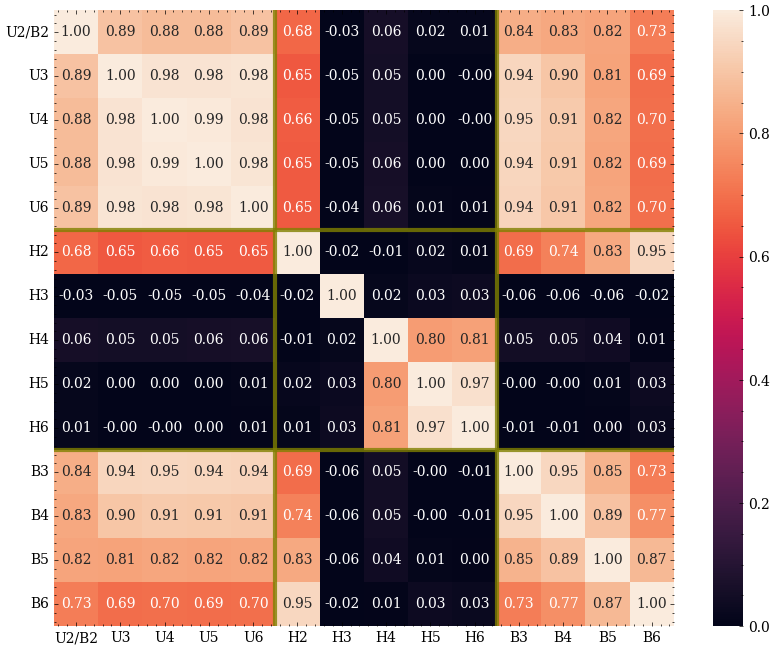

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax = sns.heatmap(KT[1:,1:], annot=True, fmt=".2f", vmin=0, vmax=1)

ax.hlines(separators, *ax.get_xlim(), linewidth=3, color='olive',alpha=0.8)
ax.vlines(separators, *ax.get_ylim(), linewidth=3, color='olive',alpha=0.8)


labels = ['U2/B2','U3','U4','U5','U6','H2','H3','H4','H5','H6','B3','B4','B5','B6'] #df.columns

ax.set_yticklabels(labels, rotation=0)
ax.set_xticklabels(labels, rotation=0)

plt.savefig("../../Figures/KT-HT_heatmap.svg")

plt.show()

## Top-K ranking


In [15]:
## Top K nodes based on a centrality dictionary ##
def topK(cent, K=None, return_list=False):
    """
    Given a dictionary node-centrality score, return the top K ranking
    """

    if not K:
        K = len(cent)
    
    C = sorted(cent, key=cent.get, reverse=True)[:K]
    ranking = {key: cent[key] for key in C}
    
    if return_list:
        return C

    return ranking

In [16]:
dictlist = df.to_dict()

In [17]:
for key1, value1 in dictlist.items():
    print(key1, topK(value1,K=10).keys())

CEC dict_keys([5, 1, 14, 18, 6, 22, 43, 23, 20, 11])
UPHEC-2 dict_keys([5, 1, 14, 43, 18, 6, 22, 40, 33, 23])
UPHEC-3 dict_keys([43, 14, 33, 5, 27, 40, 13, 70, 37, 45])
UPHEC-4 dict_keys([43, 33, 14, 27, 40, 13, 70, 37, 45, 52])
UPHEC-5 dict_keys([43, 33, 14, 27, 13, 70, 37, 45, 40, 52])
HEC-2unif dict_keys([40, 14, 18, 36, 38, 27, 39, 21, 1, 33])
HEC-3unif dict_keys([18, 14, 89, 100, 24, 39, 31, 40, 46, 70])
HEC-4unif dict_keys([94, 90, 82, 88, 87, 27, 93, 85, 86, 91])
HEC-5unif dict_keys([17, 15, 18, 20, 19, 16, 0, 67, 1, 12])
HEC-6unif dict_keys([21, 20, 18, 23, 52, 0, 19, 22, 65, 25])
HEC-7unif dict_keys([11, 6, 5, 10, 9, 4, 8, 7, 13, 25])
HEC-8unif dict_keys([13, 27, 28, 15, 19, 5, 1, 16, 18, 17])
HEC-9unif dict_keys([4, 3, 5, 8, 9, 11, 13, 20, 6, 7])
HEC-10unif dict_keys([1, 24, 31, 2, 5, 20, 3, 52, 30, 15])
HEC-11unif dict_keys([4, 3, 5, 6, 8, 10, 11, 21, 0, 13])
HEC-12unif dict_keys([25, 30, 42, 1, 2, 14, 29, 32, 27, 3])
HEC-13unif dict_keys([3, 4, 13, 21, 24, 26, 0, 1, 2, 5])


In [18]:
KTtopK = defaultdict(list)

for key1, value1 in dictlist.items():
    
    print("Comparing", key1, "against the rest.")
    
    for key2, value2 in dictlist.items():
        
        if key1 == key2:
            continue
        
        for k in range(1, len(df)):
                        
            topk1 = topK(value1, K=k)
            centrals2 = [value2[node] for node in topk1.keys()]
            
            KTtopK[key1 + " -> " + key2].append( scipy.stats.kendalltau(list(topk1.values()), centrals2).statistic )

Comparing CEC against the rest.
Comparing UPHEC-2 against the rest.
Comparing UPHEC-3 against the rest.
Comparing UPHEC-4 against the rest.
Comparing UPHEC-5 against the rest.
Comparing HEC-2unif against the rest.
Comparing HEC-3unif against the rest.
Comparing HEC-4unif against the rest.
Comparing HEC-5unif against the rest.
Comparing HEC-6unif against the rest.
Comparing HEC-7unif against the rest.
Comparing HEC-8unif against the rest.
Comparing HEC-9unif against the rest.
Comparing HEC-10unif against the rest.
Comparing HEC-11unif against the rest.
Comparing HEC-12unif against the rest.
Comparing HEC-13unif against the rest.
Comparing HEC-15unif against the rest.
Comparing HEC-16unif against the rest.
Comparing HEC-18unif against the rest.
Comparing HEC-36unif against the rest.
Comparing HEC-37unif against the rest.
Comparing AltUnif-3 against the rest.
Comparing AltUnif-4 against the rest.
Comparing AltUnif-5 against the rest.


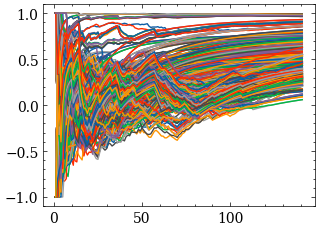

In [19]:
for key, val in KTtopK.items():
    plt.plot(val, label=key)
    
#plt.legend()

NameError: name 'cmap' is not defined

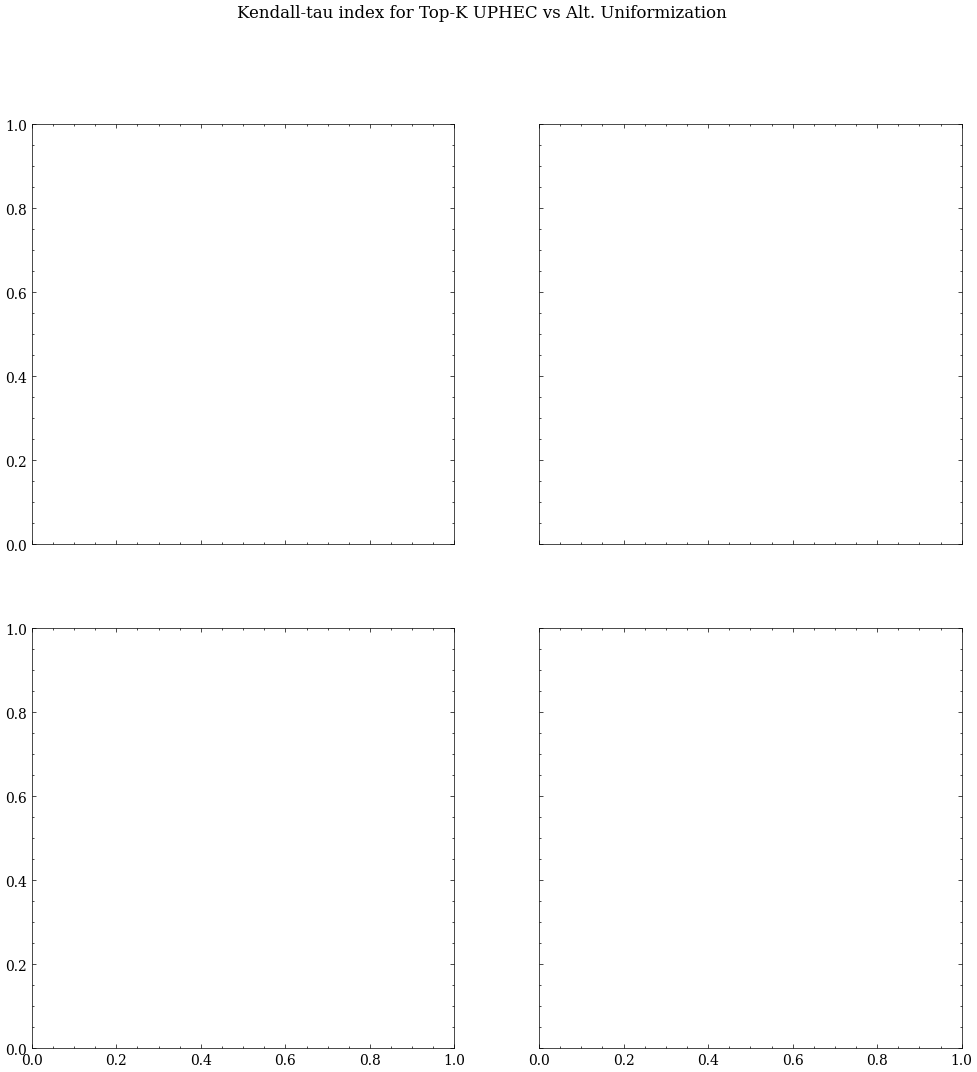

In [20]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUA = iter(cmap(np.linspace(0, 1, 4*3)))
colorAU = iter(cmap(np.linspace(0, 1, 4*3)))
colorAA = iter(cmap(np.linspace(0, 1, 2*3)))

for key, val in KTtopK.items():
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        ax[0,1].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorUA))
        ax[0,1].set_title("UPHEC - Alt. Unif.")
    
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        ax[1,0].plot(val, label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorAU))
        ax[1,0].set_title("Alt. Unif. - UPHEC")
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:
        
        ax[1,1].plot(val, label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorAA))
        ax[1,1].set_title("Alt. Unif. - Alt. Unif.")
        
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')


ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()

In [ ]:
axisdict = {}
datadict = {}

for key, val in KTtopK.items():    
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (0,0)
        datadict[label] = val[10:]
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}"
        axisdict[label] = (0,1)
        datadict[label] = val[10:]
        
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (0,2)
        datadict[label] = val[10:]
        
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:

        label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}"
        axisdict[label] = (1,0)
        datadict[label] = val[10:]
        
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}"
        axisdict[label] = (1,1)
        datadict[label] = val[10:]
        
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (1,2)
        datadict[label] = val[10:]
        

In [ ]:
maxs = {}
mins = {}
means = {}

for label, data in datadict.items():
    maxs[label] = max(data)
    mins[label] = min(data)
    means[label] = np.mean(data)

In [ ]:
# Filter what to plot
labels_to_plot = set()
for axis in [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]:
    
    axlabels = [label for label in maxs.keys() if axisdict[label] == axis]
    
    maxax = [maxim for label, maxim in maxs.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[maxax.index(max(maxax))])
    
    minax = [minim for label, minim in mins.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[minax.index(min(minax))])
    
    meanax = [mean for label, mean in means.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[meanax.index(max(meanax))])
    labels_to_plot.add(axlabels[meanax.index(min(meanax))])
    

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(11,6.5), sharex=True, sharey=True)

#fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

for label, data in datadict.items():
    
    if label in labels_to_plot:
        ax[axisdict[label][0],axisdict[label][1]].plot(range(11,len(df)), data,
                                                       label=label, linewidth=2)
    
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')


ax[0,0].legend(loc="lower right")
ax[0,1].legend(loc="lower right")
ax[0,2].legend(loc="lower right")
ax[1,0].legend(loc="lower right")
ax[1,1].legend(loc="lower right")
ax[1,2].legend(loc="lower right")

plt.tight_layout()

#plt.savefig("Figures/diseasome_KT_topK_comparisons_simple.svg")

plt.show()